# Load log files RadEye G20 gamma ray meter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt
from matplotlib.dates import DateFormatter
%matplotlib inline

.log files for the RadEye G20 gamma ray meter are encoded in cp1250.

In [2]:
fName = '../../../Data/2018_02_20-1neg2pos.log'
data = pd.read_table(fName, header = 3, encoding = 'cp1250')
data = data.rename(columns={'Unit': 'Unit Dose Rate', 'Unit.1': 'Unit Dose'})
d = data['mm/dd/yyyy'] +' ' + data['hh:mm:ss']
data['time'] = pd.to_datetime(d,infer_datetime_format=True)
timeCreated = dt.datetime.fromtimestamp(os.stat(fName).st_birthtime)
if abs(data.time.iloc[0] - timeCreated) > dt.timedelta(seconds = 2):
    data.time -= (data.time.iloc[-1]-data.time.iloc[0])
    data.time -= data.time.iloc[0]
    data.time += timeCreated - (data.time.iloc[-1]-data.time.iloc[0])

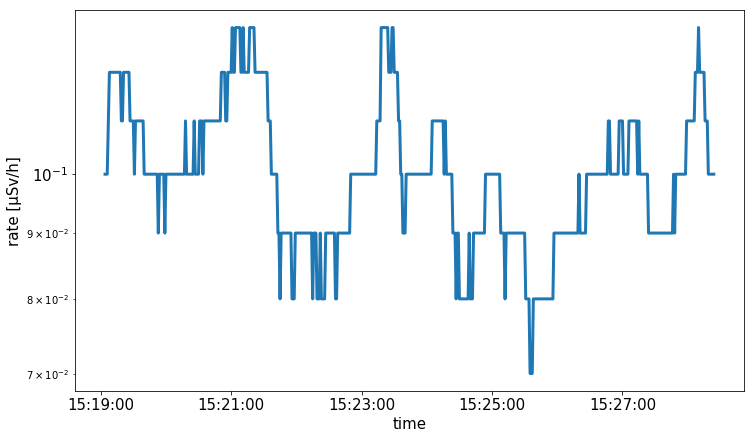

In [3]:
fs = 15

fig, ax = plt.subplots(figsize = (12,7))
ax.plot(data.time, data['Dose Rate'], lw = 3);
ax.set_yscale('log')
ax.set_xlabel('time', fontsize = fs)
ax.set_ylabel('rate [{0}]'.format(data['Unit Dose Rate'].iloc[0]), fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs);
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax.set_xticks(ax.get_xticks()[::2]);